<a href="https://colab.research.google.com/github/EderCruz/Alura-ImersaoDados/blob/main/Eder_Cruz_Barbosa_Predi%C3%A7%C3%A3o_dos_Casos_e_%C3%93bitos_de_COVID_no_Par%C3%A1_Projeto_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aluno:** Eder Cruz Barbosa
https://www.linkedin.com/in/eder-barbosa-92908411a/

https://github.com/EderCruz

###**PROJETO 4 - Bootcamp Ciência de Dados:** 
###**Predição estatística dos Casos e Óbitos de COVID no estado do Pará**

#RESUMO
Este trabalho, **Projeto do Módulo 04 -Analise dos casos de COVID-19 em uma perspectiva de Séries Temporal**, se propõe a verificar  um modelo preditivo dos casos e óbitos de COVID-19 no estado do PARÁ.

Serão utilizados as bibliotecas do AutoARIMA e Prophet para tentar obter uma modelo preditivo pasa ambos os casos. 

Os dados utilizados foram obtidos no Painel Coronavírus

Dados Análisados:
 - Casos de COVID-19 no Estado do PARÁ no período de Fevereiro de 2020 a Janeiro de 2021

 - Óbito de COVID-19 no Estado do PARÁ no período de Fevereiro de 2020 a Janeiro de 2021

#Resultado
Os modelo proposto pelo AutoArima e pelo Prophet foram insuficientes para serem considerados modelos de predição para os casos e óbitos de COVID-19 no estado do Pará

#1. Introdução 

Este trabalho vai tentar predizer os casos e óbitos de COVID-19 no estado do Pará utilizando os métodos estatíticos e bibliotecas de ciência de dados

#2. Objetivo

O objetivo deste trabalho é tentar predizer estatisticamente os caos de COVID-19 e obitos no estado do Pará para os próximos meses de 2021, até junho. Para isto, vamos utilizar as biblitecas AUTOARIMA do statismodel e PROPHET do facebook.

#3. Método

Análisar os dados referentes a casos e obitos de COVID, no estado do PARÁ desde do período que se inicio a coleta destas informações. Serãos utilizadas as seguintes bases de dados:
 - COVID-19 - Painel Coronavírus
Obter as informações sobre os casos e óbitos de COVID19 se limitando ao escopo do estado do Pará


#4. Carregamento dos Dados

Importação de Bibliotecas

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from zipfile import ZipFile
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

Definições de funções

In [2]:
def plot_lineplot_sns (dado_eixo_x, dado_eixo_y , dados_plot, titulo, label_x, label_y, cor_linha ):
  plt.figure(figsize=(14,8))
  sns.set_style("darkgrid")
  ax = sns.lineplot(x=dado_eixo_x, y=dado_eixo_y, data = dados_plot, ci = None, color= cor_linha, linewidth=1.5)
  ax.set_title(titulo, fontsize=15) 
  ax.set_xlabel(label_x, fontsize=12)
  ax.set_ylabel(label_y, fontsize=12)
  plt.xticks(rotation = 90 )
  plt.show()

def decomposicao_plot(dados_decompose_plot, frequencia, color_line, modelo):
  result_decomposicao_plot = seasonal_decompose(dados_decompose_plot,freq=frequencia, model = modelo)
  fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(16,10), sharex=True)
  result_decomposicao_plot.observed.plot(ax=ax1,color = color_line );
  result_decomposicao_plot.trend.plot(ax=ax2 ,color = color_line);
  result_decomposicao_plot.resid.plot(ax=ax3,color = color_line);
  result_decomposicao_plot.seasonal.plot(ax=ax4,color = color_line);
  ax1.set_title('Observável',loc='right');
  ax2.set_title('Tendência',loc='right');
  ax3.set_title('Resíduos',loc='right');
  ax4.set_title('Sazonalidade',loc='right');


##4.1 Carregamento das bases de dados e tratamento das tabelas

In [3]:
painel_covid_caminho = '/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/Modulo_4/projeto-04/HIST_PAINEL_COVIDBR_23jan2021.zip'

In [149]:
zip_covid = ZipFile(painel_covid_caminho)

display(zip_covid.namelist())


['HIST_PAINEL_COVIDBR_23jan2021.csv']

In [5]:
camminho_zip_covid = zip_covid.namelist()[0]

In [6]:
dados_painel_covid = pd.read_csv(zip_covid.open(camminho_zip_covid), sep = ';', thousands='.', decimal=',')

##4.2 Análise exploratória das Bases de Dados

**Análise da Base de dados do Painel COVID**

In [7]:
dados_painel_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [8]:
dados_painel_covid.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1703422,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-19,3,3015268.0,265886,612,4436,9,NaN,NaN,1.0
1703423,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-20,3,3015268.0,266506,620,4442,6,NaN,NaN,1.0
1703424,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-21,3,3015268.0,267340,834,4452,10,NaN,NaN,1.0
1703425,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-22,3,3015268.0,268394,1054,4460,8,NaN,NaN,1.0
1703426,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-23,3,3015268.0,269350,956,4468,8,NaN,NaN,1.0


In [9]:
dados_painel_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703427 entries, 0 to 1703426
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 220.9+ MB


Vamos selecionar as infomações do estado do PARÁ de casos de novos de COVID-19, e obitos novos, ambos se referem, respectivamente, a aos casos e obitos ocorridos diariamente na série temporal.

In [10]:
result_estado_PA = dados_painel_covid[['estado','data', 'casosNovos', 'obitosNovos']].query("estado == 'PA' ")
df_st_casos_novos = result_estado_PA[['data', 'casosNovos']]
df_st_obitos_novos = result_estado_PA[['data','obitosNovos']]

In [11]:
df_st_casos_novos.head()

,data,casosNovos
1672,2020-02-25,0
1673,2020-02-26,0
1674,2020-02-27,0
1675,2020-02-28,0
1676,2020-02-29,0


In [12]:
df_st_obitos_novos.head()

,data,obitosNovos
1672,2020-02-25,0
1673,2020-02-26,0
1674,2020-02-27,0
1675,2020-02-28,0
1676,2020-02-29,0


Convertendo datas para o formato date

In [13]:
df_st_casos_novos['data'] = pd.to_datetime(df_st_casos_novos['data'], format = '%Y-%m-%d')
df_st_obitos_novos['data'] = pd.to_datetime(df_st_obitos_novos['data'], format = '%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#5. Análise das bases dados

##5.1. Casos de Covid-19 e óbito por Covid-19 no estado do Pará

Plotagem dos casos de covid-19 no estado do Pará de Fevereiro de 2020 até 23 de Janeiro de 2021

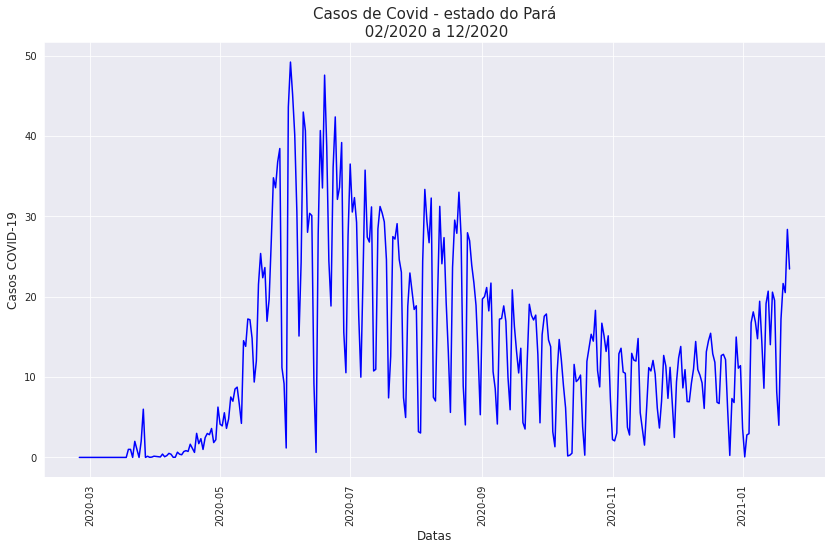

In [14]:
plot_lineplot_sns (df_st_casos_novos['data'], df_st_casos_novos['casosNovos'], df_st_casos_novos, 
                   'Casos de Covid - estado do Pará\n 02/2020 a 12/2020', 'Datas', 'Casos COVID-19', 'blue' )


Plotagem dos casos  óbito dede covid 19 no estado do Pará de Fevereiro de 2020 até 23 de Janeiro de 2021

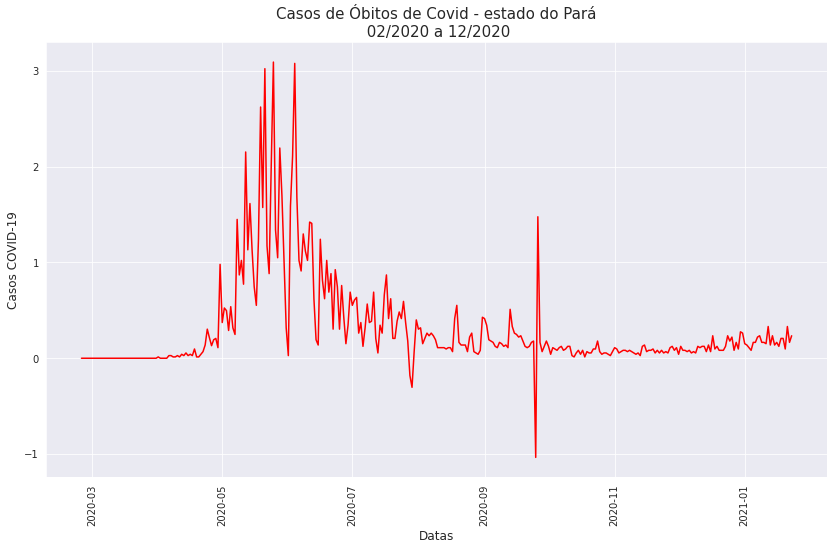

In [15]:
plot_lineplot_sns (df_st_obitos_novos['data'], df_st_obitos_novos['obitosNovos'], df_st_obitos_novos, 
                   'Casos de Óbitos de Covid - estado do Pará\n 02/2020 a 12/2020', 'Datas', 'Casos COVID-19', 'red' )

Observa-se uma incoerência no gráfico de casos de Óbito de Covid-19, próxmo ao Mês 10/2020, tem-se um valor negativo de morte, provavelmente, deve-se ao fato de lançar uma correção nos casos de morte de COVID-19, ajustando assim o número de casos acumulados

##5.2. Decomposição dos Casos de Covid-19 e óbito por Covid-19 no estado do Pará

Decomposição dos Plots dos casos de covid-19 no estado do Pará de Fevereiro de 2020 até 23 de Janeiro de 2021.
Decidiu-se por estabelecer uma frequência de 7 dias.
Primeiramente vamos plotar o modelo *additive*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if sys.path[0] == '':


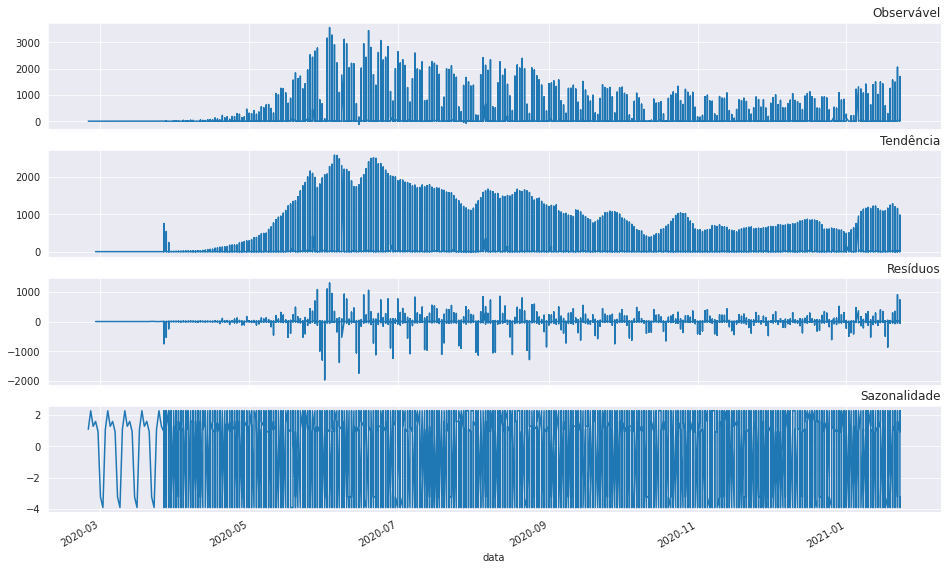

In [16]:
decomposicao_plot(df_st_casos_novos[['data','casosNovos']].set_index('data'), 7, None, 'additive')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if sys.path[0] == '':


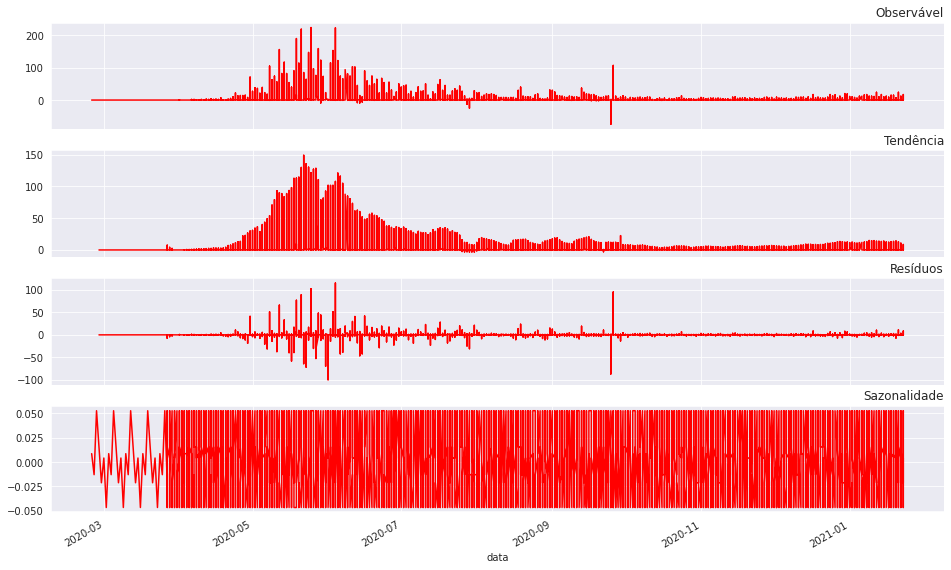

In [17]:
decomposicao_plot(df_st_obitos_novos[['data','obitosNovos']].set_index('data'), 7, 'r', 'additive')

plotar o modelo *multiplicative*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if sys.path[0] == '':


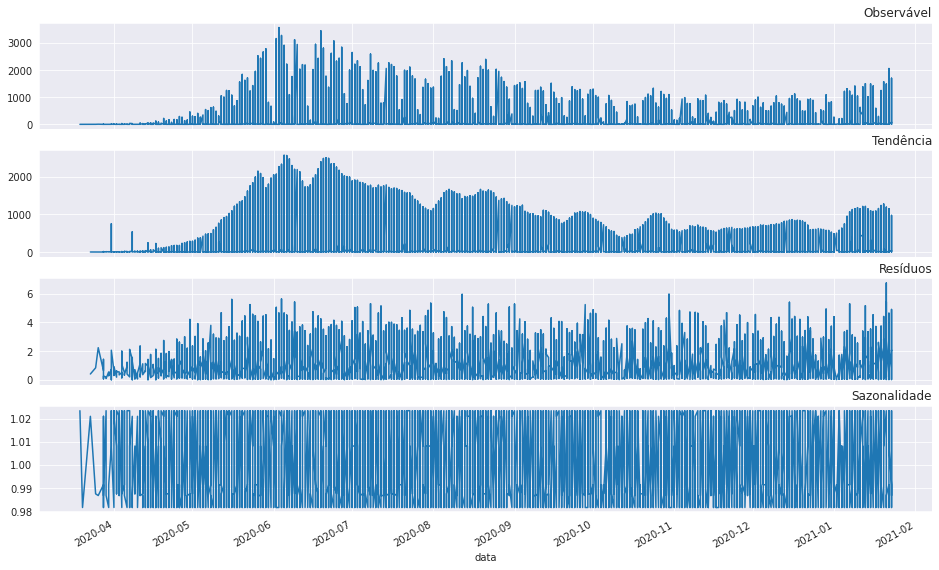

In [18]:
decomposicao_plot(df_st_casos_novos[['data','casosNovos']].query('casosNovos > 0').set_index('data'), 7, None, 'multiplicative')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if sys.path[0] == '':


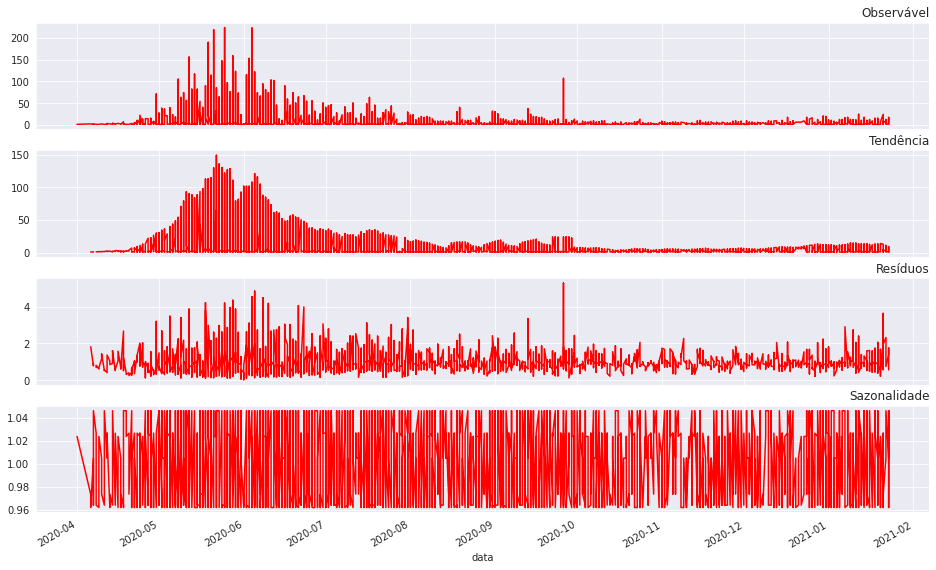

In [19]:
decomposicao_plot(df_st_obitos_novos[['data','obitosNovos']].query('obitosNovos > 0').set_index('data'), 7, 'r', 'multiplicative')

##5.2.1. Análise de Decomposição 
Em ambos os modelos Aditivo e multiplicativo pode-se observar o mesmo comportamento, tanto em casos e óbitos de covid-19, eles apresentam as mesmas características:
  - Uma elevação na onda com a crista em três meses, próximo ao mês de Junho (05/2020)
  - Um decaimento da quantidade de casos após o mês de Julho(06/2020)
  - Apresentam a mesma tendência de apresentar um valor muito abaixo dos casos do pico da pandêmcia
  - Não apresentam sazionalidade

Este decaimento tanto nos casos e óbitos de COVID-19, possivelmente, se deve as medidas de biosegurança aderidas pela sociedade, e também o conhecimento e avanço nas terapias aplicadas no tratamento da COVID-19

#5.3 Autocorrelação e Correlação Parcial
Vamos plotar a Autocorrelação e a correlação parcial dos casos e óbitos de COVID-19 no estado do Pará

##5.3.1 Autocorrelação e Correlação Parcial - Casos de Covid-19 - PA

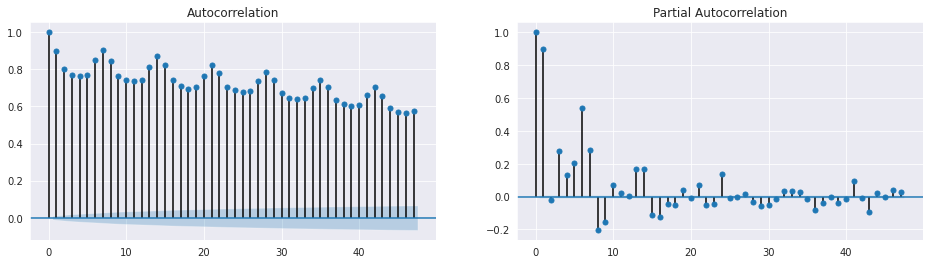

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(df_st_casos_novos["casosNovos"],ax=ax[0]);
plot_pacf(df_st_casos_novos["casosNovos"], ax=ax[1]);

Pode-se verificar uma sazionalidade e umo decrescimento no grafico de Autocorrelação dos casos de covid19, o que representa um comportamento de decaimento nos casos de contágio.
Na correlação parcial, não apresenta uma sazionalidade, porem a correlação vai diminuindo também.


##5.3.2 Autocorrelação e Correlação Parcial - Óbitos de Covid-19 - PA

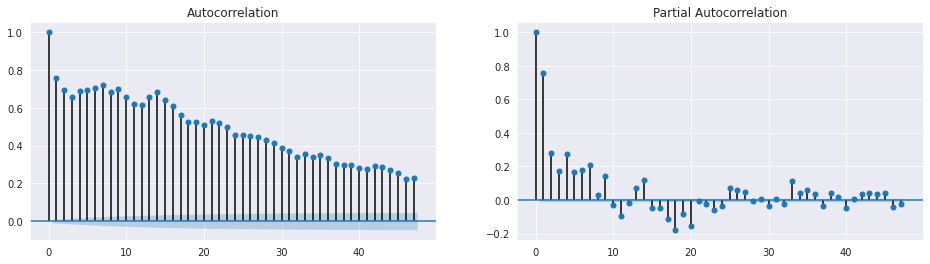

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(df_st_obitos_novos["obitosNovos"],ax=ax[0]);
plot_pacf(df_st_obitos_novos["obitosNovos"], ax=ax[1]);

Pode-se verificar um decaimento no grafico de Autocorrelação dos casos de óbito de covid-19, porém não apresenta nenhuma sazionalidade.
Na correlação parcial, não apresenta uma sazionalidade, porem a correlação vai diminuindo também.

#6. Predições
##6.1 Predições com Autoarima

In [22]:
#!pip install pmdarima

##6.1.1 Autoarima - Casos COVID-19 - Estado Pará

In [23]:
from pmdarima.arima import auto_arima 

modelo_autoarima_casos_covid = auto_arima(df_st_casos_novos['casosNovos'].values, error_action='ignore', trace="True")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=454855.714, Time=36.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=470400.695, Time=1.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=470358.239, Time=1.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=470272.763, Time=7.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=470398.695, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=458309.428, Time=25.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=457012.851, Time=18.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=456933.367, Time=33.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=449219.238, Time=105.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=457273.840, Time=44.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=448349.245, Time=91.14 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=444226.271, Time=97.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=445601.620, Time=95.79 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=440892.698, Time=96.5

In [49]:
df_st_casos_novos_dados_teste = df_st_casos_novos[-30:]
df_st_casos_novos_dados_teste

,data,casosNovos
99315,2020-12-25,0
99316,2020-12-26,0
99317,2020-12-27,0
99318,2020-12-28,0
99319,2020-12-29,1
99320,2020-12-30,0
99321,2020-12-31,0
99322,2021-01-01,0
99323,2021-01-02,0
99324,2021-01-03,0


In [113]:
df_st_casos_novos_dados_treino = df_st_casos_novos[:-30]
df_st_casos_novos_dados_treino.tail()

,data,casosNovos
99310,2020-12-20,0
99311,2020-12-21,0
99312,2020-12-22,63
99313,2020-12-23,14
99314,2020-12-24,0


In [50]:
df_st_casos_novos_dados_teste['previsao_autoarima'] = modelo_autoarima_casos_covid.predict(n_periods= 30)
df_st_casos_novos_dados_teste

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,data,casosNovos,previsao_autoarima
99315,2020-12-25,0,0.208417
99316,2020-12-26,0,-2.033299
99317,2020-12-27,0,8.484246
99318,2020-12-28,0,18.711676
99319,2020-12-29,1,12.421614
99320,2020-12-30,0,3.797498
99321,2020-12-31,0,3.875213
99322,2021-01-01,0,1.357588
99323,2021-01-02,0,-1.521920
99324,2021-01-03,0,8.193685


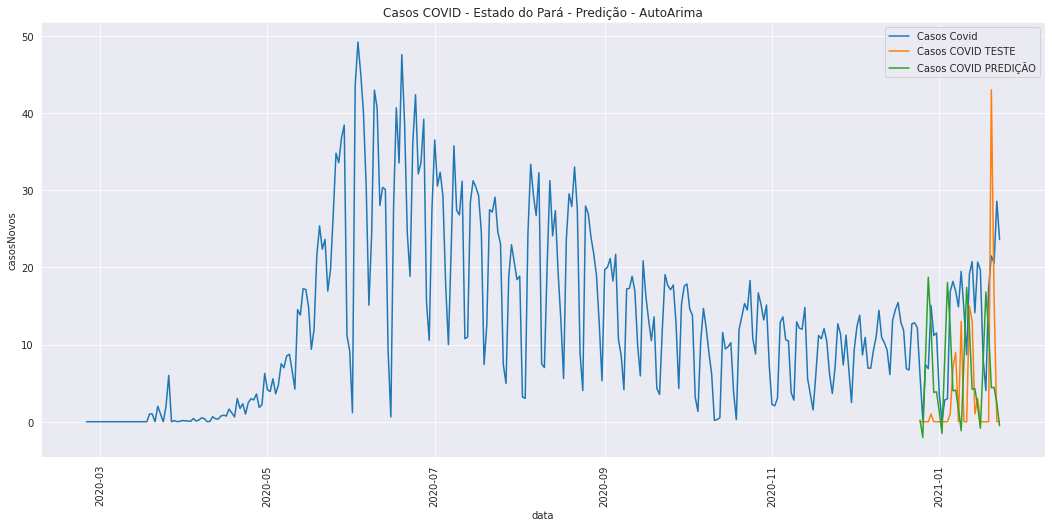

In [114]:
plt.figure(figsize=(18,8))
sns.lineplot(x='data', y='casosNovos', data = df_st_casos_novos_dados_treino, ci= None)
sns.lineplot(x='data', y='casosNovos', data = df_st_casos_novos_dados_teste,  ci= None)
sns.lineplot(x='data', y='previsao_autoarima', data = df_st_casos_novos_dados_teste,  ci= None)
plt.title("Casos COVID - Estado do Pará - Predição - AutoArima")
plt.legend(["Casos Covid","Casos COVID TESTE","Casos COVID PREDIÇÃO"])
plt.xticks(rotation = 90 )
plt.show();


Apenas o caso de teste e a predição do Auto Arima

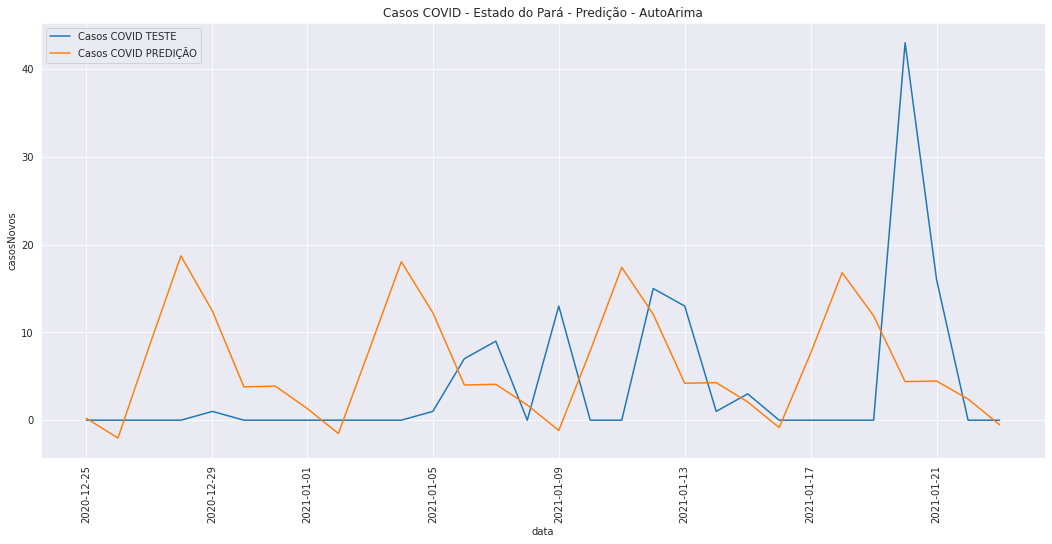

In [106]:
plt.figure(figsize=(18,8))
sns.lineplot(x='data', y='casosNovos', data = df_st_casos_novos_dados_teste,  ci= None)
sns.lineplot(x='data', y='previsao_autoarima', data = df_st_casos_novos_dados_teste,  ci= None)
plt.title("Casos COVID - Estado do Pará - Predição - AutoArima")
plt.legend(["Casos COVID TESTE","Casos COVID PREDIÇÃO"])
plt.xticks(rotation = 90 )
plt.show();

##6.1.2 Teste Autoarima - Casos COVID-19 - Estado Pará

In [110]:
resultado_autoarima_casos_covid =  mean_squared_error(df_st_casos_novos_dados_teste['casosNovos'], df_st_casos_novos_dados_teste['previsao_autoarima'])
print(f'Autoarima: {resultado_autoarima_casos_covid}')

Autoarima: 130.7322149017284


O valor da previsão dos casos de COVID-19 foi muito elevado.

##6.1.2 Autoarima - Óbito COVID-19 - Estado Pará

In [115]:
df_st_obitos_novos_dados_teste = df_st_obitos_novos[-30:]
df_st_obitos_novos_dados_teste

,data,obitosNovos
99315,2020-12-25,0
99316,2020-12-26,0
99317,2020-12-27,0
99318,2020-12-28,0
99319,2020-12-29,0
99320,2020-12-30,0
99321,2020-12-31,0
99322,2021-01-01,0
99323,2021-01-02,0
99324,2021-01-03,0


In [117]:
df_st_obitos_novos_dados_treino = df_st_obitos_novos[:-30]
df_st_obitos_novos_dados_treino

,data,obitosNovos
1672,2020-02-25,0
1673,2020-02-26,0
1674,2020-02-27,0
1675,2020-02-28,0
1676,2020-02-29,0
...,...,...
99310,2020-12-20,0
99311,2020-12-21,0
99312,2020-12-22,0
99313,2020-12-23,0


In [118]:
modelo_autoarima_obitos_covid = auto_arima(df_st_obitos_novos['obitosNovos'].values, error_action='ignore', trace="True")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=200654.051, Time=39.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=217183.687, Time=1.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=210805.985, Time=2.79 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=201696.777, Time=7.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=217181.687, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=200760.338, Time=15.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=200584.219, Time=13.90 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=200840.001, Time=12.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=208458.780, Time=3.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=199381.486, Time=14.95 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=204194.980, Time=4.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=199324.557, Time=19.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=202627.793, Time=5.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=198898.780, Time=25.58 se

In [119]:
df_st_obitos_novos_dados_teste['previsao_autoarima'] = modelo_autoarima_obitos_covid.predict(n_periods= 30)
df_st_obitos_novos_dados_teste

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,data,obitosNovos,previsao_autoarima
99315,2020-12-25,0,0.000066
99316,2020-12-26,0,0.000143
99317,2020-12-27,0,-0.000218
99318,2020-12-28,0,-0.000092
99319,2020-12-29,0,-0.000380
99320,2020-12-30,0,-0.000340
99321,2020-12-31,0,-0.000401
99322,2021-01-01,0,-0.000532
99323,2021-01-02,0,-0.000411
99324,2021-01-03,0,-0.000615


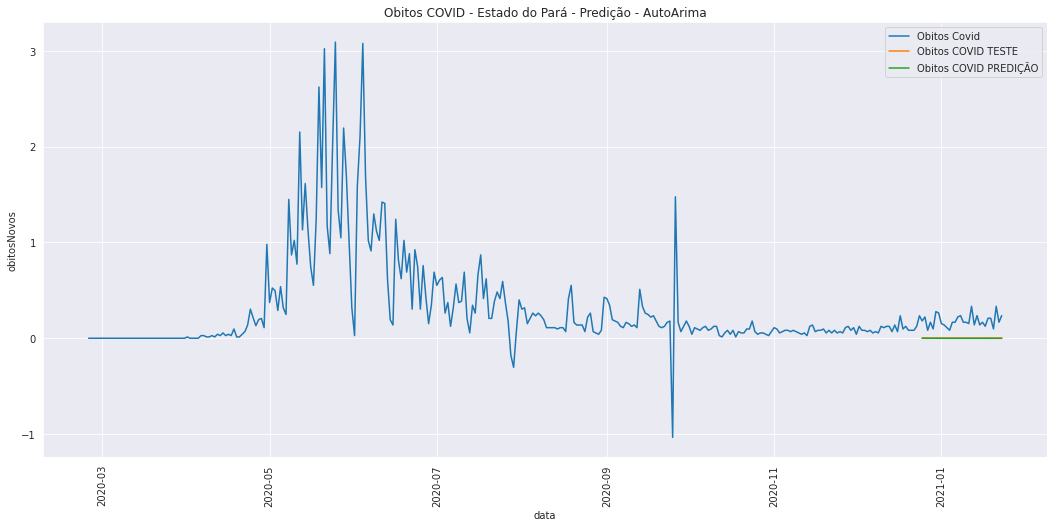

In [120]:
plt.figure(figsize=(18,8))
sns.lineplot(x='data', y='obitosNovos', data = df_st_obitos_novos_dados_treino, ci= None)
sns.lineplot(x='data', y='obitosNovos', data = df_st_obitos_novos_dados_teste ,  ci= None)
sns.lineplot(x='data', y='previsao_autoarima', data = df_st_obitos_novos_dados_teste,  ci= None)
plt.title("Obitos COVID - Estado do Pará - Predição - AutoArima")
plt.legend(["Obitos Covid","Obitos COVID TESTE","Obitos COVID PREDIÇÃO"])
plt.xticks(rotation = 90 )
plt.show();

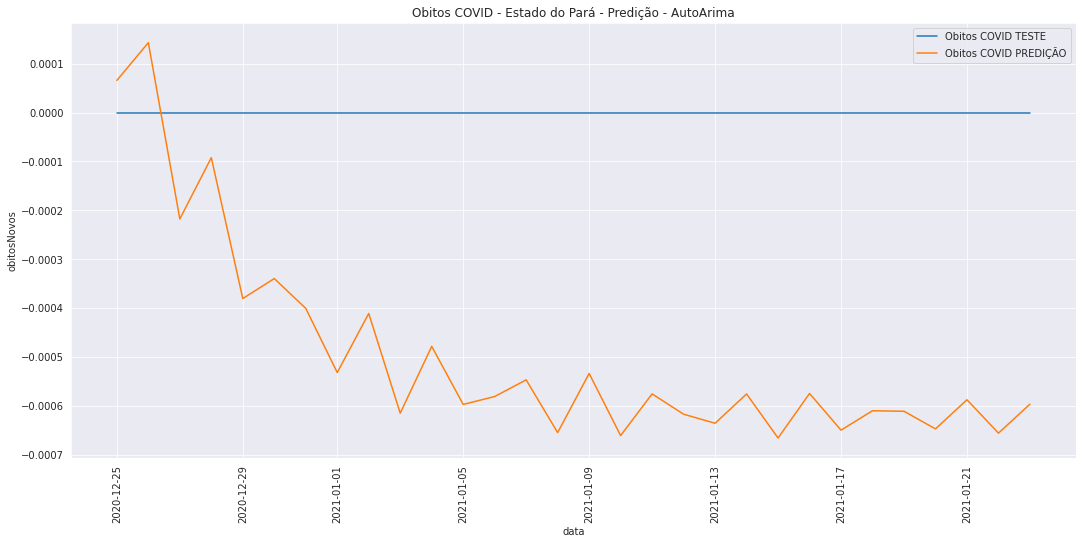

In [121]:
plt.figure(figsize=(18,8))
sns.lineplot(x='data', y='obitosNovos', data = df_st_obitos_novos_dados_teste ,  ci= None)
sns.lineplot(x='data', y='previsao_autoarima', data = df_st_obitos_novos_dados_teste,  ci= None)
plt.title("Obitos COVID - Estado do Pará - Predição - AutoArima")
plt.legend(["Obitos COVID TESTE","Obitos COVID PREDIÇÃO"])
plt.xticks(rotation = 90 )
plt.show();

##6.1.3 Teste Autoarima - Óbitos COVID-19 - Estado Pará

In [123]:
resultado_autoarima_obitos_covid =  mean_squared_error(df_st_obitos_novos_dados_teste['obitosNovos'], df_st_obitos_novos_dados_teste['previsao_autoarima'])
print(f'Autoarima: {resultado_autoarima_obitos_covid}')

Autoarima: 2.8809212591782676e-07


O valor do teste da previsão dos óbitos de COVID-19 foi muito bem próximo de um.
O fato relevante é que não foram registrados nenhuma morte por COVID-19 no estado do Pará nos últimos 30 dias

##6.2 Predições com Prophet

In [134]:
modelo_profeta = Prophet(seasonality_mode='multiplicative')

##6.2.1 Prophet - Casos COVID-19 - Estado Pará

In [135]:
df_casos_covid_profeta_treino = df_st_casos_novos[['data', 'casosNovos']].rename({'data':'ds', 'casosNovos':'y'}, axis = 1)
df_casos_covid_profeta_treino

,ds,y
1672,2020-02-25,0
1673,2020-02-26,0
1674,2020-02-27,0
1675,2020-02-28,0
1676,2020-02-29,0
...,...,...
99340,2021-01-19,0
99341,2021-01-20,43
99342,2021-01-21,16
99343,2021-01-22,0


In [136]:
modelo_profeta_treino_casos_covid = modelo_profeta.fit(df_casos_covid_profeta_treino)
modelo_profeta_treino_casos_covid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
future_casos_covid = modelo_profeta_treino_casos_covid.make_future_dataframe(periods=30, freq='D')
future_casos_covid

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
359,2021-02-18
360,2021-02-19
361,2021-02-20
362,2021-02-21


In [138]:
resultado_prof_casos_covid = modelo_profeta_treino_casos_covid.predict(future_casos_covid)
resultado_prof_casos_covid

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-25,-3.325038,-147.680948,140.828945,-3.325038,-3.325038,0.152308,0.152308,0.152308,0.152308,0.152308,0.152308,0.0,0.0,0.0,-3.831469
1,2020-02-26,-3.241428,-151.800742,141.862248,-3.241428,-3.241428,0.374268,0.374268,0.374268,0.374268,0.374268,0.374268,0.0,0.0,0.0,-4.454592
2,2020-02-27,-3.157817,-145.608498,150.245763,-3.157817,-3.157817,0.220817,0.220817,0.220817,0.220817,0.220817,0.220817,0.0,0.0,0.0,-3.855117
3,2020-02-28,-3.074206,-142.929585,147.821391,-3.074206,-3.074206,0.232112,0.232112,0.232112,0.232112,0.232112,0.232112,0.0,0.0,0.0,-3.787767
4,2020-02-29,-2.990596,-141.423296,143.126940,-2.990596,-2.990596,0.079728,0.079728,0.079728,0.079728,0.079728,0.079728,0.0,0.0,0.0,-3.229031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-02-18,18.692552,-121.544839,175.974155,15.035070,22.092883,0.220817,0.220817,0.220817,0.220817,0.220817,0.220817,0.0,0.0,0.0,22.820187
360,2021-02-19,18.822278,-110.224392,168.349898,14.957382,22.467305,0.232112,0.232112,0.232112,0.232112,0.232112,0.232112,0.0,0.0,0.0,23.191157
361,2021-02-20,18.952004,-114.242480,162.444528,14.845262,22.867360,0.079728,0.079728,0.079728,0.079728,0.079728,0.079728,0.0,0.0,0.0,20.463015
362,2021-02-21,19.081729,-129.598265,149.194908,14.681503,23.202510,-0.470375,-0.470375,-0.470375,-0.470375,-0.470375,-0.470375,0.0,0.0,0.0,10.106170


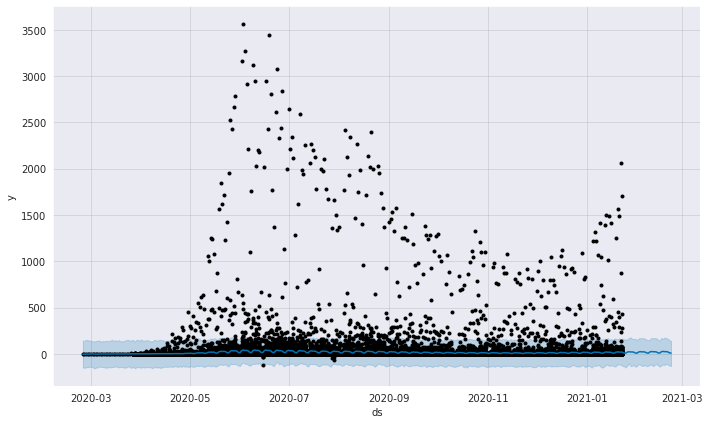

In [139]:
modelo_profeta_treino_casos_covid.plot(resultado_prof_casos_covid);

O modelo proposto pelo Prophet para os Casos de Obitos de COVID-19 no Estado do Pará, não reflete a realidade, nem o dados obtidos, aproximando os caso de Covid a 0

##6.2.2 Prophet - Óbitos COVID-19 - Estado Pará

In [142]:
modelo_profeta_obitos_covid = Prophet(seasonality_mode='multiplicative')

In [140]:
df_obitos_covid_profeta_treino = df_st_obitos_novos[['data', 'obitosNovos']].rename({'data':'ds', 'obitosNovos':'y'}, axis = 1)
df_obitos_covid_profeta_treino

,ds,y
1672,2020-02-25,0
1673,2020-02-26,0
1674,2020-02-27,0
1675,2020-02-28,0
1676,2020-02-29,0
...,...,...
99340,2021-01-19,0
99341,2021-01-20,0
99342,2021-01-21,0
99343,2021-01-22,0


In [143]:
modelo_profeta_treino_obitos_covid = modelo_profeta_obitos_covid.fit(df_obitos_covid_profeta_treino)
modelo_profeta_treino_obitos_covid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
future_obitos_covid = modelo_profeta_treino_obitos_covid.make_future_dataframe(periods=30, freq='D')
future_obitos_covid

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
359,2021-02-18
360,2021-02-19
361,2021-02-20
362,2021-02-21


In [146]:
resultado_prof_obitos_covid = modelo_profeta_treino_obitos_covid.predict(future_obitos_covid)
resultado_prof_obitos_covid

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-25,-0.176179,-5.344955,5.036018,-0.176179,-0.176179,0.222490,0.222490,0.222490,0.222490,0.222490,0.222490,0.0,0.0,0.0,-0.215378
1,2020-02-26,-0.171708,-5.537394,5.133739,-0.171708,-0.171708,-0.034509,-0.034509,-0.034509,-0.034509,-0.034509,-0.034509,0.0,0.0,0.0,-0.165783
2,2020-02-27,-0.167237,-5.525858,4.545970,-0.167237,-0.167237,0.491962,0.491962,0.491962,0.491962,0.491962,0.491962,0.0,0.0,0.0,-0.249511
3,2020-02-28,-0.162765,-5.400471,5.234955,-0.162765,-0.162765,0.074920,0.074920,0.074920,0.074920,0.074920,0.074920,0.0,0.0,0.0,-0.174960
4,2020-02-29,-0.158294,-5.584724,5.281450,-0.158294,-0.158294,-0.287194,-0.287194,-0.287194,-0.287194,-0.287194,-0.287194,0.0,0.0,0.0,-0.112833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-02-18,0.237026,-4.851718,5.692802,-0.096868,0.578107,0.491962,0.491962,0.491962,0.491962,0.491962,0.491962,0.0,0.0,0.0,0.353633
360,2021-02-19,0.238828,-4.857873,5.899487,-0.121929,0.605893,0.074920,0.074920,0.074920,0.074920,0.074920,0.074920,0.0,0.0,0.0,0.256721
361,2021-02-20,0.240631,-5.590753,5.393533,-0.146869,0.626118,-0.287194,-0.287194,-0.287194,-0.287194,-0.287194,-0.287194,0.0,0.0,0.0,0.171523
362,2021-02-21,0.242433,-4.771037,5.820491,-0.172344,0.653279,-0.304576,-0.304576,-0.304576,-0.304576,-0.304576,-0.304576,0.0,0.0,0.0,0.168594


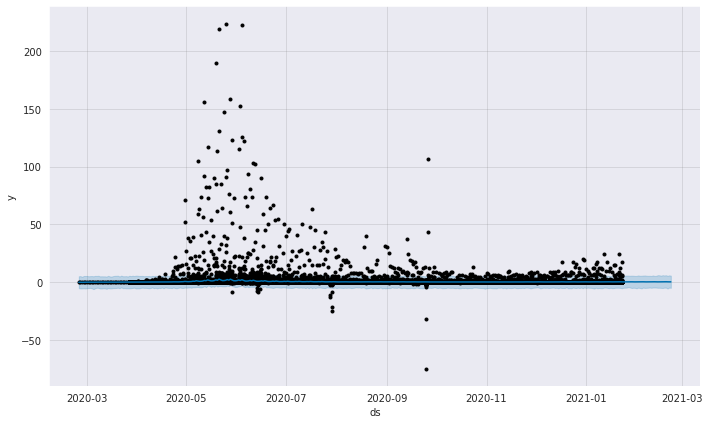

In [148]:
modelo_profeta_treino_obitos_covid.plot(resultado_prof_obitos_covid);

O modelo proposto pelo Prophet para os Casos de Obitos de COVID-19 no Estado do Pará, não reflete a realidade,  nem o dados obtidos, aproximando os óbito de Covid-19 a 0

#7. Considerações Finais
Foram utilizados as bibliotecas AutoARIMA e Prophet para predizer estatisticamente os casos e óbitos de COVID-19 no estado do Pará.
Considero os modelos de predição dispostos pelo AutoArima e Prophet insuficientes, pois não conseguem se aproximar dos valores teste dos dados de COVID-19, também não se aproximam da realidade.

Isso pode-se ser ocasionado a diversos fatores: a série temporal não ser estacionária, não apresentar sazionalidade, não levar em consideração outros fatores, falta de acuracia no registro de dados das bases consultadas, entre outros fatores. 


#8. Referências
###[1] Dads COVID Painel Coronavírus
>https://covid.saude.gov.br/